In [1]:
from sklearn import datasets
import matplotlib.pyplot as plot
import math

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

In [17]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'Sepal size distribution')

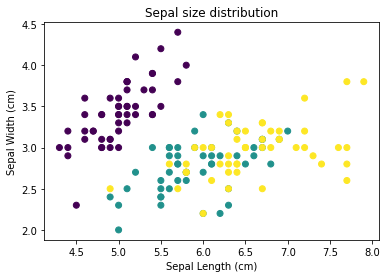

In [28]:
# Select all rows and only first two columns (sepal length/width)
points = iris.data[:, :2]
 
# Target will be used to plot samples in different colors for different species
color = iris.target
 
plot.scatter(points[:,0], points[:,1], c=color)
plot.xlabel('Sepal Length (cm)')
plot.ylabel('Sepal Width (cm)')
plot.title('Sepal size distribution')

Text(0.5, 1.0, 'Petal size distribution')

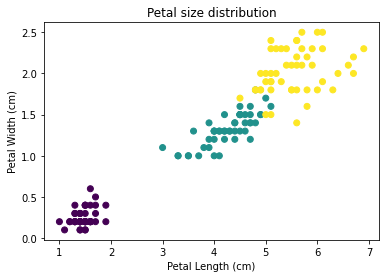

In [36]:
# Select all rows and only first two columns (sepal length/width)
points = iris.data[:, 2:]
 
# Target will be used to plot samples in different colors for different species
color = iris.target
 
plot.scatter(points[:,0], points[:,1], c=color)
plot.xlabel('Petal Length (cm)')
plot.ylabel('Petal Width (cm)')
plot.title('Petal size distribution')

Text(0.5, 1.0, 'Parabola')

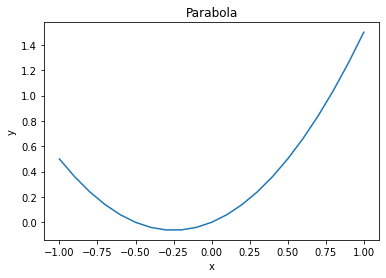

In [40]:
def parabola(x):
    return x**2 + x/2.0
 
def derivative(x):
  return 2*x + 0.5
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plot.plot(x, y)
plot.xlabel('x')
plot.ylabel('y')
plot.title('Parabola')

Estimated minimum -0.25, -0.06
Derivative (gradient) 0.00


Text(0.5, 1.0, 'Parabola')

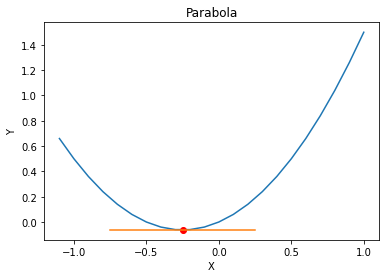

In [64]:
x_k = 0.0
 
# Experiment with these two hyperparameters
learning_rate = .5
epochs = 2
 
for i in range(epochs):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient
 
print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)
 
x = [i * 0.1 for i in range(-11, 11)]
y = [parabola(xi) for xi in x]
plot.plot(x, y)
plot.xlabel('X')
plot.ylabel('Y')
plot.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plot.plot(line_x, line_y)
plot.title('Parabola')